# Security & Privacy (CC2009) - 2023/2024

## ASSIGNMENT #1: Performance Benchmarking of Cryptographic Mechanisms

### Due date: March 22, 23:59
### Grading: Assignment #1 is worth 2 points

In this exercise you should measure the time AES, RSA and SHA take to process files of different sizes, using a
python implementation of the encryption/description and hash mechanisms.
Some notes:
- You should measure the time of cryptographic operations/algorithms only, not including the time for generation
of files and others side aspects.
- If you use padding, this may affect the results specially for small file sizes

-------------------------------------------------------------------------------------------------------------------------------------

In [103]:
import os
import string
import timeit
import hashlib
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

-------------------------------------------------------------------------------------------------------------------------------------

A. Generate random text files with the following sizes:
- For AES (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152 
- For SHA (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152 
- For RSA (in bytes): 2, 4, 8, 16, 32, 64, 128


In [104]:
# Sizes in bytes
file_sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
file_sizes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]
file_sizes_rsa = [2, 4, 8, 16, 32, 64, 128]

def generate_random_text_file(size_bytes):
    return os.urandom(size_bytes)

# Generate random text files for aes
for size in file_sizes_aes:
    with open(f"aes_{size}.txt", "wb") as f:
        f.write(generate_random_text_file(size))

# Generate random text files for sha
for size in file_sizes_sha:
    with open(f"sha_{size}.txt", "wb") as f:
        f.write(generate_random_text_file(size))

# Generate random text files for rsa
for size in file_sizes_rsa:
    with open(f"rsa_{size}.txt", "wb") as f:
        f.write(generate_random_text_file(size))

-------------------------------------------------------------------------------------------------------------------------------------

B. Encrypt and decrypt all these files using AES. Employ a key of 256 bits. Measure the time it takes to encrypt
and decrypt each of the files. To do this, you might want to use the python module timeit.
Make sure to produce statistically significant results. Do results change if you run a fixed algorithm over
the same file multiple times? And what if you run an algorithm over multiple randomly generated files
of fixed size?

-------------------------------------------------------------------------------------------------------------------------------------

C. Using the python module for RSA encryption and decryption, measure the time of RSA encryption and decryption
for the file sizes listed in part A, with a key of size 2048 bits (minimum recommended for RSA).

Encryption and Decryption times for RSA:

File size: 2 bytes, Encryption time: 0.000046 seconds, Decryption time: 0.001189 seconds
File size: 4 bytes, Encryption time: 0.000043 seconds, Decryption time: 0.001069 seconds
File size: 8 bytes, Encryption time: 0.000042 seconds, Decryption time: 0.001096 seconds
File size: 16 bytes, Encryption time: 0.000038 seconds, Decryption time: 0.001176 seconds
File size: 32 bytes, Encryption time: 0.000035 seconds, Decryption time: 0.001069 seconds
File size: 64 bytes, Encryption time: 0.000034 seconds, Decryption time: 0.001074 seconds
File size: 128 bytes, Encryption time: 0.000038 seconds, Decryption time: 0.001223 seconds


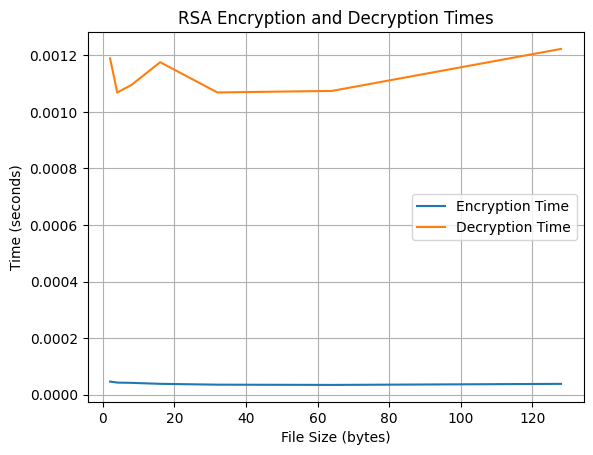

In [105]:
# Private and public keys for encryption/decryption
def generate_rsa_keys(): 
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    return private_key, public_key

# Encrypt data using RSA public key
def rsa_encrypt(public_key, input_file):
    encrypted = public_key.encrypt(input_file,padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()),algorithm=hashes.SHA256(),label=None))
    return encrypted

# Decrypt data using RSA private key
def rsa_decrypt(private_key, encrypted_data):
    decrypted = private_key.decrypt(encrypted_data, padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()),algorithm=hashes.SHA256(),label=None))
    return decrypted

# Measure RSA encryption and decryption times for various file sizes
def measure_rsa_performance(file_sizes_rsa):
    private_key, public_key = generate_rsa_keys()
    encryption_times = []
    decryption_times = []
    for size in file_sizes_rsa:
        with open(f"rsa_{size}.txt", 'rb') as f:
            data = f.read()
        
        # Measure encryption time
        encryption_time = timeit.timeit(lambda: rsa_encrypt(public_key, data), number=10) / 10
        encryption_times.append(encryption_time)
        
        # Encrypt the data for decryption measurement
        encrypted_data = rsa_encrypt(public_key, data)
        
        # Measure decryption time
        decryption_time = timeit.timeit(lambda: rsa_decrypt(private_key, encrypted_data), number=10) / 10
        decryption_times.append(decryption_time)
        
        print(f"File size: {size} bytes, Encryption time: {encryption_time:.6f} seconds, Decryption time: {decryption_time:.6f} seconds")
    
    return encryption_times, decryption_times

print("Encryption and Decryption times for RSA:\n")

# Measure RSA performance
encryption_times, decryption_times = measure_rsa_performance(file_sizes_rsa)

# Plotting
plt.plot(file_sizes_rsa, encryption_times, label='Encryption Time')
plt.plot(file_sizes_rsa, decryption_times, label='Decryption Time')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (seconds)')
plt.title('RSA Encryption and Decryption Times')
plt.legend()
plt.grid(True)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------

D. Measure the time for SHA-256 hash generation for the file sizes listed in part a.

SHA digest generation times:

File size: 8 bytes, SHA-256 hash generation time: 0.000001 seconds
File size: 64 bytes, SHA-256 hash generation time: 0.000001 seconds
File size: 512 bytes, SHA-256 hash generation time: 0.000001 seconds
File size: 4096 bytes, SHA-256 hash generation time: 0.000003 seconds
File size: 32768 bytes, SHA-256 hash generation time: 0.000166 seconds
File size: 262144 bytes, SHA-256 hash generation time: 0.000113 seconds
File size: 2097152 bytes, SHA-256 hash generation time: 0.000906 seconds


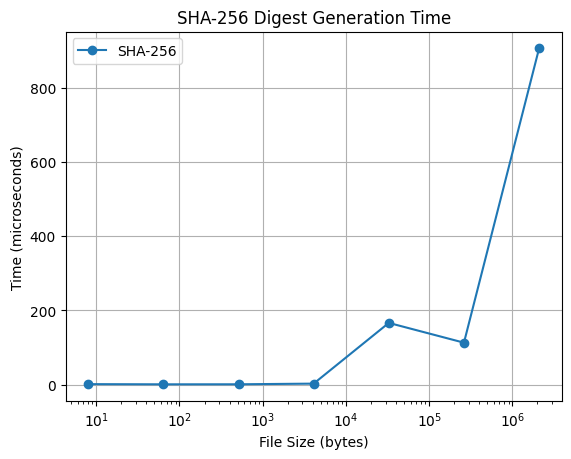

In [106]:
# Function to generate a SHA-256 hash of the data
def sha256_hash(input_file):
    sha256 = hashlib.sha256()
    sha256.update(input_file)
    return sha256.hexdigest()

# Measure the time for SHA-256 hash generation for various file sizes
def measure_sha256_performance(file_sizes_sha):
    hash_times = []
    for size in file_sizes_sha:
        with open(f"sha_{size}.txt", 'rb') as f:
            data = f.read()
        
        # Measure hash generation time
        hash_time = timeit.timeit(lambda: sha256_hash(data), number=10) / 10
        hash_times.append(hash_time)
        
        print(f"File size: {size} bytes, SHA-256 hash generation time: {hash_time:.6f} seconds")
    return hash_times

print("SHA digest generation times:\n")

# Measure and print SHA-256 performance
hash_times = measure_sha256_performance(file_sizes_sha)

# Plotting the results
plt.plot(file_sizes_sha, [time * 1e6 for time in hash_times], marker='o', label='SHA-256')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('SHA-256 Digest Generation Time')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------

E. Prepare a report of your observations, including the following information:
- Code implemented for points b., c., and d. above
- Brief explanation of the main components of the code (the rest should be submitted in a separate compressed
file)
- Explain how you generated/obtained the results – must be statistically significant. This must include a
description of the experimental setup (e.g. computer characteristics, OS, software versions).
- Plots showing: (i) AES encryption/decryption times; (ii) RSA encryption times; (iii) RSA decryption times;
and (iv) SHA digests generation times (plots can be combined for easier comparison). In these graphs, the
X axis should plot the file sizes in units of bytes, and the Y axis should plot time measurements in units of
microseconds (us).
1
- The report should also analyze and explain the performance results of:
    - Comparison between AES encryption and RSA encryption.
    - Comparison between AES encryption and SHA digest generation.
    - Comparison between RSA encryption and decryption times.